In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data

In [2]:
folder = "NLP_engineer_assigment_sentiment"

train_path = folder + "/train_data_restaurant.tsv"
test_path = folder + "/test_data_restaurant.tsv"

header_row = ["Customer Voice", "Sentiment Label"]

In [3]:
train_set = pd.read_csv(train_path, names = header_row, sep = '\t')
test_set = pd.read_csv(test_path, names = header_row, sep = '\t')

In [4]:
print("Missing value in data train: \n",train_set.isna().sum())
print("Missing value in data test: \n",test_set.isna().sum())

Missing value in data train: 
 Customer Voice     0
Sentiment Label    0
dtype: int64
Missing value in data test: 
 Customer Voice     0
Sentiment Label    0
dtype: int64


In [5]:
train_set.head(5)

Customer Voice Sentiment Label
0  Saya makan di sini dengan menggunakan voucher ...        negative
1  Mas indosat buat main game enemy has been slai...        negative
2  Trus sy percuma dong update no hp terbaru ke c...        negative
3  jika kita pilih dia maka akan ada lebih dari 3...        negative
4  Dikarenakan adik saya suka dengan restoran ini...        negative

In [6]:
test_set.head(5)

Customer Voice Sentiment Label
0  Tempatnya sih menarik, mudah dijangkau dari se...        negative
1  lokasi strategis penasaran karena daerah situ ...        negative
2  Sesuai namanya, restoran ini unik dalam menyaj...        negative
3  Saya datang ketika petang dan hujan deras temp...        negative
4  Kalao mau ke sana jangan pas malem sih, soalny...        negative

In [7]:
print("Train set median: ", train_set["Customer Voice"].str.len().median())
print("Train set mean: ", train_set["Customer Voice"].str.len().mean())
print("Train set std: ", train_set["Customer Voice"].str.len().std())
print("Train set max: ", train_set["Customer Voice"].str.len().max())

print("Test set Median: ", test_set["Customer Voice"].str.len().median())
print("Test set mean: ", test_set["Customer Voice"].str.len().mean())
print("Test set std: ", test_set["Customer Voice"].str.len().std())
print("Test set max: ", test_set["Customer Voice"].str.len().max())

Train set median:  229.5
Train set mean:  249.78033707865168
Train set std:  103.30648016003937
Train set max:  538


In [8]:
print("Test set Median: ", test_set["Customer Voice"].str.len().median())
print("Test set mean: ", test_set["Customer Voice"].str.len().mean())
print("Test set std: ", test_set["Customer Voice"].str.len().std())
print("Test set max: ", test_set["Customer Voice"].str.len().max())

Test set Median:  229.0
Test set mean:  251.74054054054054
Test set std:  105.30301891771428
Test set max:  507


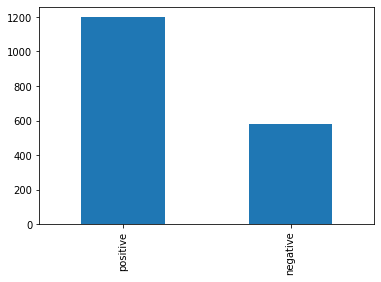

In [9]:
train_set['Sentiment Label'].value_counts().plot.bar() #imbalance class

# Data preprocessing

In [10]:
from nltk.tokenize import word_tokenize 
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
import string

In [11]:
def preproccess(df, header_name):
    # Lowering all words
    df = df.apply(lambda x: x.astype(str).str.lower())
    # remove all numbers
    df[header_name] = df[header_name].apply(lambda x: re.sub(r"\d+", "", x))
    # remove all punctuations
    df[header_name] = df[header_name].apply(lambda x: x.translate(str.maketrans("","",string.punctuation)))
    # remove whitespaces
    df[header_name] = df[header_name].apply(lambda x: x.strip())
    
    #stop word removal
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    df[header_name] = df[header_name].apply(lambda x: stopword.remove(x))
    
    # Stemming, this may take a while
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    df[header_name] = df[header_name].apply(lambda x: stemmer.stem(x))

    return df


In [12]:
Preproccessed_data_train = preproccess(train_set, "Customer Voice")
Preproccessed_data_test = preproccess(test_set, "Customer Voice")

In [13]:
Preproccessed_data_train.head(5)

Customer Voice Sentiment Label
0  makan sini guna voucher disdus paket nasi ayam...        negative
1  mas indosat buat main game enemy has been slai...        negative
2  trus sy percuma dong update no hp baru cs cab ...        negative
3       kita pilih maka ada lebih kampung akan gusur        negative
4  karena adik suka restoran akhir mampir sini aw...        negative

In [14]:
Preproccessed_data_test.head(5)

Customer Voice Sentiment Label
0  tempat sih tarik mudah jangkau segala arah men...        negative
1  lokasi strategis penasaran daerah situ rame tr...        negative
2  sesuai nama restoran unik saji makan pakai pir...        negative
3  datang petang hujan deras tempat parkir cukup ...        negative
4  kalao mau sana jangan pas malem sih soal bakal...        negative

In [16]:
train_set.to_pickle("./ProccessedData/Train.pkl")
test_set.to_pickle("./ProccessedData/Test.pkl")

In [17]:
Preproccessed_data_train.to_pickle("./ProccessedData/Preproccessed_data_train.pkl")
Preproccessed_data_test.to_pickle("./ProccessedData/Preproccessed_data_test.pkl")